In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2022-04-20 15:17:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M  20.7MB/s    in 3.0s    

2022-04-20 15:17:35 (20.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor(datFile)

In [ ]:
img_path = "testdlib.jpg"

In [ ]:
img = dlib.load_rgb_image(img_path)
faces = face_detector(img, 1)

In [ ]:
landmark_tuple = []
for k, d in enumerate(faces):
   landmarks = landmark_detector(img, d)
   for n in range(0, 27):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmark_tuple.append((x, y))
      cv2.circle(img, (x, y), 2, (255, 255, 0), -1)

In [ ]:
routes = []
 
for i in range(15, -1, -1):
   from_coordinate = landmark_tuple[i+1]
   to_coordinate = landmark_tuple[i]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)
 
for i in range(17, 20):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)
 
for i in range(24, 26):
   from_coordinate = landmark_tuple[i]
   to_coordinate = landmark_tuple[i+1]
   routes.append(from_coordinate)
 
from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

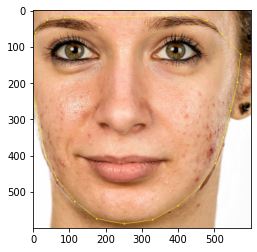

In [ ]:
for i in range(0, len(routes)-1):
   from_coordinate = routes[i]
   to_coordinate = routes[i+1]
   img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)

plt.imshow(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


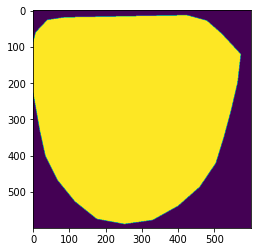

In [ ]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(np.bool)
 
out = np.zeros_like(img)
out[mask] = img[mask]
 
plt.imshow(mask)